In [1]:
import os
os.environ['autocnet_config'] = '/home/jlaura/autocnet_projects/demo.yml'
from autocnet_server.graph.graph import NetworkCandidateGraph

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Generate VRTs
[GDAL VRTs](http://www.gdal.org/gdal_vrttut.html) are a super powerful virtual format that allow for on the fly transformations, warping, etc.  In conjunction with the pfeffernusse and a CTX CSM camera model, AutoCNet Server is able to provide image warping for visualization.  Inside of a config file, the directories section allows the user to define a location for VRTs.  The call below (`generate_vrts`) creates the virtual (XML) files in the user define directory.  These files can then be 'loaded' into QGIS where they will be on-the-fly projected.

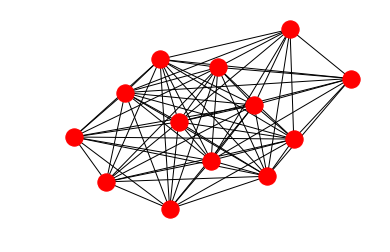

In [2]:
ncg = NetworkCandidateGraph.from_database()
ncg.plot()

In [3]:
ncg.generate_vrts()

## Visualization
Below, the contents of a VRT are printed.  These are not super exciting to look at and are shown only to illustrate what is occuring.  The VRT is generated by walking the image footprint using the CSM, converting the body fixed coordinates into lon/lat, and then computing an affine geotransformation that is used by GDAL to warp the pixels (nearest neaighbor interpolation in this case) into some coordinate reference (Mars2000 in this case). The VRT can then be loaded into QGIS using the standard `Add Raster Layer` button. 

In [4]:
!cat /scratch/jlaura/ctx_demo/vrt/B12_014304_1893_XN_09N203W.cal.vrt

<VRTDataset rasterXSize="6122" rasterYSize="12883" subClass="VRTWarpedDataset">
  <SRS>GEOGCS["unnamed ellipse",DATUM["unknown",SPHEROID["unnamed",3396190,169.8944472236118]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]]</SRS>
  <GeoTransform>  1.5598922515186894e+02,  1.0062105198266899e-04,  0.0000000000000000e+00,  1.0048128111930296e+01,  0.0000000000000000e+00, -1.0062105198266899e-04</GeoTransform>
  <VRTRasterBand dataType="Float32" band="1" subClass="VRTWarpedRasterBand">
    <NoDataValue>0</NoDataValue>
    <ColorInterp>Gray</ColorInterp>
  </VRTRasterBand>
  <BlockXSize>512</BlockXSize>
  <BlockYSize>128</BlockYSize>
  <GDALWarpOptions>
    <WarpMemoryLimit>6.71089e+07</WarpMemoryLimit>
    <ResampleAlg>NearestNeighbour</ResampleAlg>
    <WorkingDataType>Float32</WorkingDataType>
    <Option name="INIT_DEST">NO_DATA</Option>
    <SourceDataset relativeToVRT="0">&lt;VRTDataset rasterXSize="5000" rasterYSize="12288"&gt;
     &lt;Metadata/&gt;
     &lt;GCPList Project

Exception in thread jdemo:working:
Traceback (most recent call last):
  File "/home/jlaura/anaconda3/envs/ct/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/jlaura/autocnet_server/autocnet_server/graph/graph.py", line 562, in run
    callback_func(msg)
  File "/home/jlaura/autocnet_server/autocnet_server/graph/graph.py", line 397, in ring_matcher_callback
    if rm['count'] <= config['cluster']['maxfailures']:
KeyError: 'count'

